## Maestría en Inteligencia Artificial Aplicada (MNA)
### Proyecto Integrador
### Dra. Grettel Barceló Alonso / Dr. Carlos Alberto Villaseñor Padilla
### Avance 2. Ingeniería de características

### Integrantes
- A01794457 - Iossif Moises Palli Laura
- A01793984 - Brenda Zurazy Rodríguez Pérez
- A01794630 - Jesús Ramseths Echeverría Rivera

In [26]:
# Paqueterías a utilizar
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Ajustar las opciones de pandas para que se vea el texto completo en las columnas
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [27]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from spacy import displacy

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### I. Carga de los datos

In [28]:
df = pd.read_csv('../data/q_a_db.csv') # Se realiza la carga del conjunto de preguntas y respuestas
df.head()

date                                                 question  \
0  2001-06-04  ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1  2001-06-04               ¿Qué regula la Ley de Fondos de Inversión?   
2  2001-06-04            ¿Qué debe fomentar la aplicación de esta ley?   
3  2001-06-04                   ¿Qué es un activo objeto de inversión?   
4  2001-06-04         ¿Quién regula los fondos de inversión en México?   

                                                                                     answer  \
0                                                                    El 4 de junio de 2001.   
1                       Regula la organización y funcionamiento de los fondos de inversión.   
2                               El desarrollo equilibrado y la diversificación del capital.   
3  Son valores títulos y documentos aplicables al régimen de la Ley del Mercado de Valores.   
4                                               La Comisión Nacional Bancaria y de Valores.   

              category  
0  Fondos de Inversión  
1  Fondos de Inversión  
2  Fondos de Inversión  
3  Fondos de Inversión  
4  Fondos de Inversión

### II. Construcción

Limpieza de datos

In [29]:
# Cambiar a tipo de fecha
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d').dt.strftime('%Y-%m-%d')

# Eliminar filas duplicadas de las variables 'question' y 'answer'
df_clean = df.drop_duplicates(subset=['question', 'answer'])

# Eliminar espacios en blanco extra al principio y al final en las columnas de texto
df_clean['question'] = df_clean['question'].str.strip()
df_clean['answer'] = df_clean['answer'].str.strip()
df_clean['category'] = df_clean['category'].str.strip()

In [30]:
df_clean.head()

date                                                 question  \
0  2001-06-04  ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1  2001-06-04               ¿Qué regula la Ley de Fondos de Inversión?   
2  2001-06-04            ¿Qué debe fomentar la aplicación de esta ley?   
3  2001-06-04                   ¿Qué es un activo objeto de inversión?   
4  2001-06-04         ¿Quién regula los fondos de inversión en México?   

                                                                                     answer  \
0                                                                    El 4 de junio de 2001.   
1                       Regula la organización y funcionamiento de los fondos de inversión.   
2                               El desarrollo equilibrado y la diversificación del capital.   
3  Son valores títulos y documentos aplicables al régimen de la Ley del Mercado de Valores.   
4                                               La Comisión Nacional Bancaria y de Valores.   

              category  
0  Fondos de Inversión  
1  Fondos de Inversión  
2  Fondos de Inversión  
3  Fondos de Inversión  
4  Fondos de Inversión

In [31]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['question'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar los primeros 10 registros
tfidf_df.head(10)

10  105  108   12   13   14   15   16   17   18   19   20   21   22   23  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    25   26   28   30   32   33   34   37   38   39   3º   40   41   45   48  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    50   51   52   53   58   5º   60   63   65   68   72   75   7º   80   85  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    90   95  abierto  abiertos  abusiva  acceso  accionaria  acciones  \
0  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
1  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
2  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
3  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
4  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
5  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
6  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
7  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
8  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   
9  0.0  0.0      0.0       0.0      0.0     0.0         0.0       0.0   

   accionista  accionistas  acción  acelerada  aceptada  aceptadas  \
0         0.0          0.0     0.0        0.0       0.0        0.0   
1         0.0          0.0     0.0        0.0       0.0        0.0   
2         0.0          0.0     0.0        0.0       0.0        0.0   
3         0.0          0.0     0.0        0.0       0.0        0.0   
4         0.0          0.0     0.0        0.0       0.0        0.0   
5         0.0          0.0     0.0        0.0       0.0        0.0   
6         0.0          0.0     0.0        0.0       0.0        0.0 



*   Se utiliza TfidfVectorizer para calcular la importancia de las palabras en las preguntas. La salida es una matriz donde cada fila representa una pregunta y cada columna representa un término con su valor TF-IDF.



In [32]:
ngram_vectorizer = CountVectorizer(ngram_range=(2, 3))
ngram_matrix = ngram_vectorizer.fit_transform(df['question'])
ngram_df = pd.DataFrame(ngram_matrix.toarray(), columns=ngram_vectorizer.get_feature_names_out())
ngram_df.head(10)

10 sobre  10 sobre la  105 de  105 de la  108 de  108 de la  12 sobre  \
0         0            0       0          0       0          0         0   
1         0            0       0          0       0          0         0   
2         0            0       0          0       0          0         0   
3         0            0       0          0       0          0         0   
4         0            0       0          0       0          0         0   
5         0            0       0          0       0          0         0   
6         0            0       0          0       0          0         0   
7         0            0       0          0       0          0         0   
8         0            0       0          0       0          0         0   
9         0            0       0          0       0          0         0   

   12 sobre la  13 sobre  13 sobre las  14 bis  14 bis sobre  15 sobre  \
0            0         0             0       0             0         0   
1            0         0             0       0             0         0   
2            0         0             0       0             0         0   
3            0         0             0       0             0         0   
4            0         0             0       0             0         0   
5            0         0             0       0             0         0   
6            0         0             0       0             0         0   
7            0         0             0       0             0         0   
8            0         0             0       0             0         0   
9            0         0             0       0             0         0   

   15 sobre la  16 sobre  16 sobre la  18 sobre  18 sobre la  19 sobre  \
0            0         0            0         0            0         0   
1            0         0            0         0            0         0   
2            0         0            0         0            0         0   
3            0         0            0         0            0         0   
4            0         0            0         0            0         0   
5            0         0            0         0            0         0   
6            0         0            0         0            0         0   
7            0         0            0         0            0         0   
8            0         0            0         0            0         0   
9            0         0            0         0            0         0   

   19 sobre la  19 sobre las  20 de  20 de acciones  20 de las  20 sobre  \
0            0             0      0               0          0         0   
1            0             0      0               0          0         0   
2            0             0      0               0          0         0   
3            0             0      0               0          0         0   
4            0             0      0               0          0         0   
5            0             0      0               0          0         0   
6            0             0      0               0          0         0   
7            0             0      0               0          0         0   
8            0             0      0               0          0         0   
9            0             0      0               0          0         0   

   20 sobre las  20 sobre los  21 sobre  21 sobre los  22 sobre  22 sobre el  \
0             0             0         0             0         0            0   
1             0             0         0             0         0            0   
2             0             0         0             0         0            0   
3             0             0         0             0         0            0   
4             0             0         0             0         0            0   
5             0             0         0             0         0            0   
6             0             0         0             0         0            0   
7             0             0         0             0      



*   Con CountVectorizer se generan secuencias de palabras en bigramas y trigramas. Esto permite capturar patrones de frases completas en lugar de palabras individuales.



In [33]:
# !python -m spacy download en_core_web_sm 
# Descargar el core web

In [34]:
nlp = spacy.load('en_core_web_sm')

In [35]:
### Lematización/Stemming
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    """Función para lematizar el texto entrante"""
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.isalpha()]
    return ' '.join(tokens)


In [36]:
df['lemmatized_question'] = df['question'].apply(lemmatize_text)

In [37]:
df[['question', 'lemmatized_question']]

question  \
0                      ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1                                   ¿Qué regula la Ley de Fondos de Inversión?   
2                                ¿Qué debe fomentar la aplicación de esta ley?   
3                                       ¿Qué es un activo objeto de inversión?   
4                             ¿Quién regula los fondos de inversión en México?   
...                                                                        ...   
1138                     ¿Qué ocurre si no se corrige una infracción continua?   
1139            ¿Qué medidas correctivas existen en caso de fallo del sistema?   
1140  ¿Qué acciones puede tomar el Banco de México si detecta irregularidades?   
1141              ¿Qué significa la compensación bruta en un sistema de pagos?   
1142                            ¿Qué mecanismos existen para prevenir fraudes?   

                                                     lemmatized_question  
0                      fecha fue publicada la ley de fondos de inversión  
1                                   regula la ley de fondos de inversión  
2                                debe fomentar la aplicación de esta ley  
3                                        e un activo objeto de inversión  
4                               regula los fondos de inversión en méxico  
...                                                                  ...  
1138                    ocurre si no se corrige una infracción continuum  
1139            medidas correctivas existen en caso de fallo del sistema  
1140  acciones puede tomar el banco de méxico si detecta irregularidades  
1141              significa la compensación bruta en un sistema de pagos  
1142                            mecanismos existen para prevenir fraudes  

[1143 rows x 2 columns]



*   Con WordNetLemmatizer reducimos las palabras a su forma base (lema) para unificar términos similares. Además, eliminamos las palabras vacías o "stop words".



In [38]:
### 5. POS-Tagging (Part-of-Speech)
def pos_tagging(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    return pos_tags

df['pos_tags'] = df['question'].apply(pos_tagging)

In [39]:
df[['question', 'pos_tags']].head()

question  \
0  ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1               ¿Qué regula la Ley de Fondos de Inversión?   
2            ¿Qué debe fomentar la aplicación de esta ley?   
3                   ¿Qué es un activo objeto de inversión?   
4         ¿Quién regula los fondos de inversión en México?   

                                                                                                                                   pos_tags  
0  [(¿Qué, JJ), (fecha, NN), (fue, NN), (publicada, NN), (la, FW), (Ley, NNP), (de, FW), (Fondos, NNP), (de, FW), (Inversión, NNP), (?, .)]  
1                             [(¿Qué, JJ), (regula, NN), (la, NN), (Ley, NNP), (de, FW), (Fondos, NNP), (de, FW), (Inversión, NNP), (?, .)]  
2                             [(¿Qué, JJ), (debe, NN), (fomentar, NN), (la, FW), (aplicación, FW), (de, FW), (esta, FW), (ley, NN), (?, .)]  
3                                           [(¿Qué, JJ), (es, NN), (un, JJ), (activo, JJ), (objeto, NN), (de, IN), (inversión, FW), (?, .)]  
4                         [(¿Quién, JJ), (regula, NN), (los, NN), (fondos, NN), (de, IN), (inversión, FW), (en, FW), (México, NNP), (?, .)]



*   Utilizamos nltk.pos_tag para etiquetar cada palabra con su función gramatical (sustantivos, verbos, etc.), lo que puede ser útil para analizar la estructura de las preguntas y respuestas.



### III. Normalización

Ahora podemos tokenizar cada enunciado de las variables 'question' y 'answer', es decir vamos a dividir el texto en unidades más pequeñas, llamadas tokens.
Estos tokens pueden ser palabras, frases o incluso caracteres. Es un paso fundamental en el procesamiento de lenguaje natural (PLN) porque convierte el texto en una forma más manejable para análisis o modelado.

In [40]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
# Tokenizar las preguntas ('question') y respuestas ('answer')
df_clean['question_tokens'] = df_clean['question'].apply(word_tokenize)
df_clean['answer_tokens'] = df_clean['answer'].apply(word_tokenize)

In [42]:
# Mostrar algunas filas con las nuevas columnas tokenizadas
print(df_clean[['question', 'question_tokens', 'answer', 'answer_tokens']].head())

                                                  question  \
0  ¿Qué fecha fue publicada la Ley de Fondos de Inversión?   
1               ¿Qué regula la Ley de Fondos de Inversión?   
2            ¿Qué debe fomentar la aplicación de esta ley?   
3                   ¿Qué es un activo objeto de inversión?   
4         ¿Quién regula los fondos de inversión en México?   

                                                        question_tokens  \
0  [¿Qué, fecha, fue, publicada, la, Ley, de, Fondos, de, Inversión, ?]   
1                 [¿Qué, regula, la, Ley, de, Fondos, de, Inversión, ?]   
2              [¿Qué, debe, fomentar, la, aplicación, de, esta, ley, ?]   
3                      [¿Qué, es, un, activo, objeto, de, inversión, ?]   
4           [¿Quién, regula, los, fondos, de, inversión, en, México, ?]   

                                                                                     answer  \
0                                                                    El 4 de juni

### IV. Selección / Extracción

Otra de las etapas importantes en el proceso de preparación es la eliminación de las stopwords.

In [43]:
# Descargar los recursos necesarios de nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
# Obtener la lista de stop words en español
stop_words = set(stopwords.words('spanish'))

In [45]:
# Eliminar stop words de las preguntas y respuestas
df_clean['question_tokens'] = df_clean['question_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])
df_clean['answer_tokens'] = df_clean['answer_tokens'].apply(lambda tokens: [word for word in tokens if word.lower() not in stop_words])

Nube de Palabras (Word Cloud)

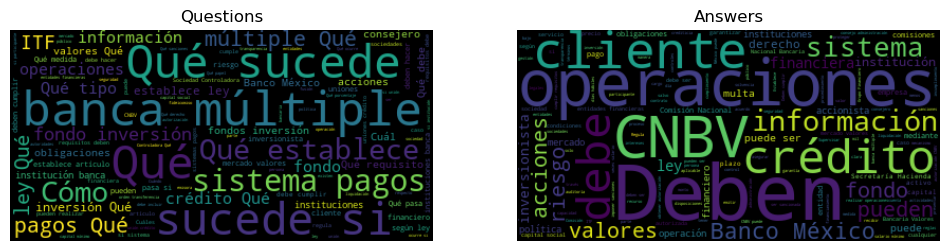

In [46]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,12))

# Combinar todas las preguntas tokenizadas en una sola cadena de texto
all_questions = ' '.join([' '.join(tokens) for tokens in df_clean['question_tokens']])
all_answers = ' '.join([' '.join(tokens) for tokens in df_clean['answer_tokens']])

# Nube de palabras de las preguntas:
wordcloudnn = WordCloud().generate(all_questions)
ax1.imshow(wordcloudnn, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Questions')

# Nube de palabras de las respuestas:
wordcloudnn = WordCloud().generate(all_answers)
ax2.imshow(wordcloudnn, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Answers')

plt.show()

### V. Conclusiones